# CIVE586 Assignment 3: PSHA Analysis
> Created by: Mingda Lyu     
> Last modified: 31th, Oct, 2024

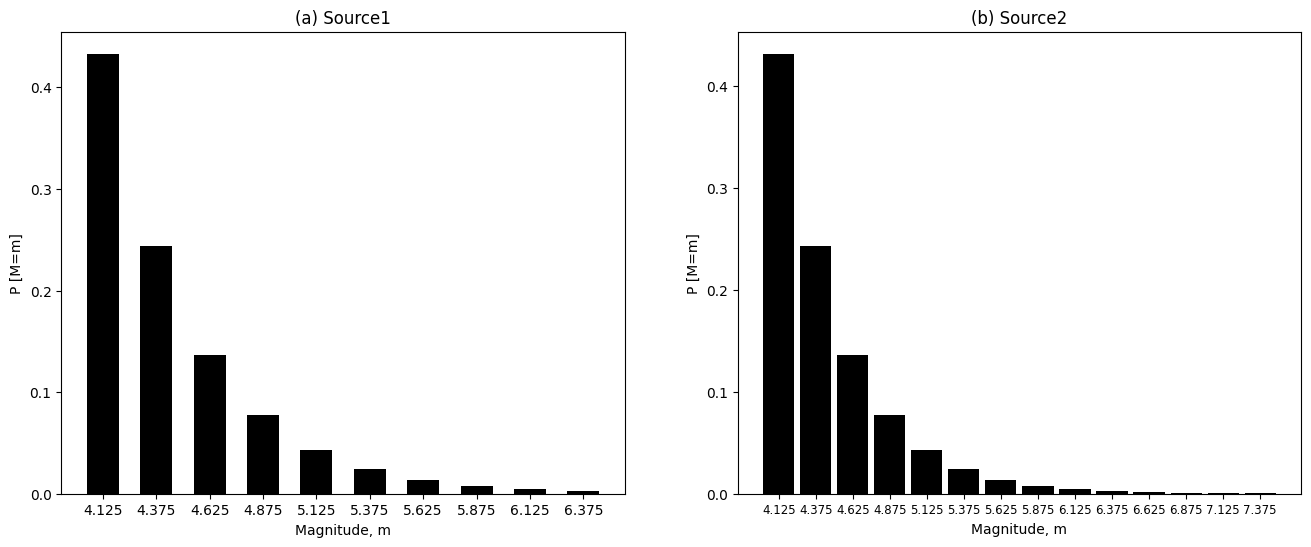

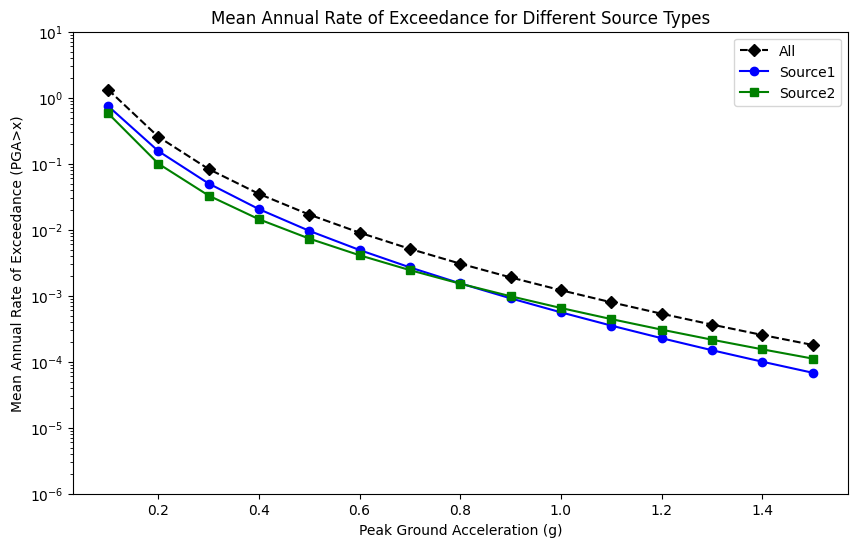

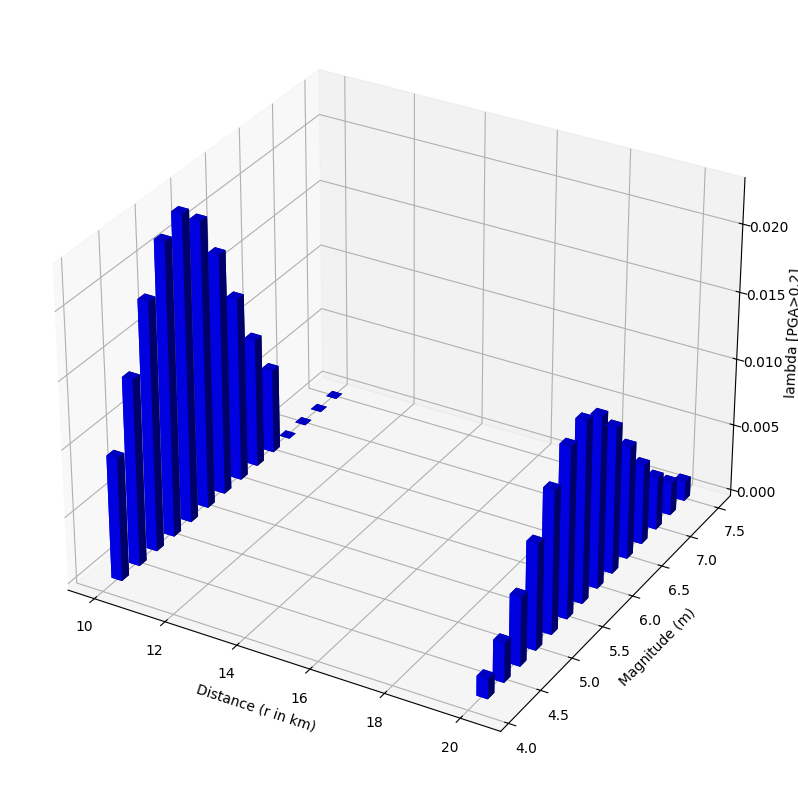

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats

# EQ source input
m_max1 = 6.5
m_max2 = 7.5
m_min = 4
a1 = 4.5
b1 = 1
a2 = 4.8
b2 = 1
r1 = 10
r2 = 20

# Step1: The source-to-site distance characterization
p_r1 = 1 #Point source, the distance is fixed 
p_r2 = 1

# Step2: Earthquake magnitude uncertainty characterization

def get_pm(mmax,mmin,a,b,dm):
    alpha = a*np.log(10) 
    beta = b*np.log(10)
    v = np.e**(alpha-beta*mmin) # calculation of {\lambda_m}
    N = int((mmax-mmin)/dm)
    # Initialize a 'mi' array
    mi = np.zeros(N)
    # Initialize a 'Pm' array
    pm = np.zeros(N)
    for i in range(1,N+1):
        mi[i-1] = mmin+(dm*(i-1)+dm*i)/2
        pm[i-1] = beta*np.e**(-1*beta*(mi[i-1]-mmin))/(1-np.e**(-1*beta*(mmax-mmin)))*dm
    return v,mi,pm

v1,m_i1,p_m1 = get_pm(m_max1,m_min,a1,b1,0.25) #probabilities of various magnitudes 
v2,m_i2,p_m2 = get_pm(m_max2,m_min,a2,b2,0.25)

# Step3+4: Identify the ground motion intensity & combine step 1,2,3

def get_lambda(pm,pr,mi,r,v):
    N = len(pm)
    sigma_lny = 0.57
    # Initialize a 'lnPGA' array
    lnPGA = np.zeros(N)
    # Initialize a 'pPGA' array
    pPGA = np.zeros(15) # from 0.1g~1.5g
    # Initialize a 'annual rate of exceedance: lambda' array
    lmda = np.zeros((N,15))
    for i in range(1,N+1):
        lnPGA[i-1] = -0.152+0.859*mi[i-1]-1.803*np.log(r+25)
        for j in range(1,16):
            x = 0.1*j
            pPGA[j-1] = 1-stats.norm.cdf(np.log(0.1*j),lnPGA[i-1],sigma_lny) #CDF of normal distribution
            lmda[i-1,j-1] = v*pPGA[j-1]*pm[i-1]*pr
    lmda_sum = np.sum(lmda, axis=0)
    return lmda, lmda_sum

lmda1,lmda_sum1 = get_lambda(p_m1,p_r1,m_i1,r1,v1)
lmda2,lmda_sum2 = get_lambda(p_m2,p_r2,m_i2,r2,v2)

lmda_all = lmda_sum1+lmda_sum2
x_pga = np.linspace(0.1,1.5,15)  # Time array

# Plotting
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.bar(m_i1,p_m1,width=0.15,color='black',tick_label=np.around(m_i1,decimals=3))
plt.xlabel('Magnitude, m')
plt.ylabel('P [M=m]')
plt.title('(a) Source1')

plt.subplot(1,2,2)
plt.bar(m_i2,p_m2,width=0.21,color='black',tick_label=np.around(m_i2,decimals=3))
plt.xlabel('Magnitude, m')
plt.ylabel('P [M=m]')
plt.tick_params(axis='x', labelsize=8.5)
plt.title('(b) Source2')

plt.figure(figsize=(10,6))
plt.plot(x_pga,lmda_all,marker='D',linestyle='dashed',label='All',color='black')
plt.plot(x_pga,lmda_sum1,marker='o',label='Source1',color='blue')
plt.plot(x_pga,lmda_sum2,marker='s',label='Source2',color='green')
plt.yscale('log')
plt.ylim(1e-6, 1e1)
plt.xlabel('Peak Ground Acceleration (g)')
plt.ylabel('Mean Annual Rate of Exceedance (PGA>x)')
plt.title('Mean Annual Rate of Exceedance for Different Source Types')
plt.legend()
plt.show()

# Deaggregation plot
x = np.array([10,20])
y = m_i2
x, y = np.meshgrid(x, y)
len_1 = lmda1.shape[0]
len_2 = lmda2.shape[0]
max_len = max(len_1,len_2)
z = np.zeros((max_len,2))
z[:len_1,0] = lmda1[:, 1]
z[:len_2,1] = lmda2[:, 1]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
dx = 0.3
dy = 0.1
dz = z.flatten()
ax.bar3d(x.flatten(), y.flatten(), np.zeros_like(dz), dx, dy, dz, color='blue')
ax.set_xlabel('Distance (r in km)')
ax.set_ylabel('Magnitude (m)')
ax.set_zlabel('lambda [PGA>0.2]')
# ax.view_init(elev=45)
plt.tight_layout()
plt.show()


In [3]:
lmda1

array([[1.43002451e-01, 9.17978583e-03, 9.94172920e-04, 1.54261475e-04,
        3.07963824e-05, 7.40644629e-06, 2.05629309e-06, 6.40132993e-07,
        2.18833845e-07, 8.08923427e-08, 3.19540706e-08, 1.33648639e-08,
        5.87523686e-09, 2.69844284e-09, 1.28851574e-09],
       [1.45880858e-01, 1.38923615e-02, 1.92323545e-03, 3.56582365e-04,
        8.18616582e-05, 2.20865326e-05, 6.76137536e-06, 2.29146254e-06,
        8.44484439e-07, 3.33921273e-07, 1.40210694e-07, 6.20107559e-08,
        2.86987850e-08, 1.38246796e-08, 6.90122178e-09],
       [1.33120347e-01, 1.85270131e-02, 3.26376981e-03, 7.21481114e-04,
        1.90219669e-04, 5.75252041e-05, 1.94054112e-05, 7.15622191e-06,
        2.84205173e-06, 1.20173719e-06, 5.36232339e-07, 2.50721552e-07,
        1.22135605e-07, 6.16973568e-08, 3.21935850e-08],
       [1.09506123e-01, 2.18473829e-02, 4.86916488e-03, 1.27978427e-03,
        3.86873744e-04, 1.30995959e-04, 4.86567431e-05, 1.95133910e-05,
        8.34738171e-06, 3.77303690e-0

In [4]:
lmda_sum1

array([7.49603806e-01, 1.55495108e-01, 5.01253063e-02, 2.04979220e-02,
       9.61257366e-03, 4.92460800e-03, 2.68623823e-03, 1.53679246e-03,
       9.13273830e-04, 5.60061419e-04, 3.52732050e-04, 2.27332914e-04,
       1.49508010e-04, 1.00108308e-04, 6.81200925e-05])